# Experiment #8: Introduction to Computer Vision
<b>Mohammed Abed Alkareem</b>
<b>1210708</b>

## 1.1    Image processing and manipulation with OpenCV

In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!wget https://www.birzeit.edu/sites/default/files/buildings.jpg

--2024-08-08 00:08:42--  https://www.birzeit.edu/sites/default/files/buildings.jpg
Loaded CA certificate '/usr/ssl/certs/ca-bundle.crt'
Resolving www.birzeit.edu (www.birzeit.edu)... 172.67.38.181, 104.22.8.107, 104.22.9.107, ...
Connecting to www.birzeit.edu (www.birzeit.edu)|172.67.38.181|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2024-08-08 00:08:42 ERROR 403: Forbidden.



### Loading and displaying an image.

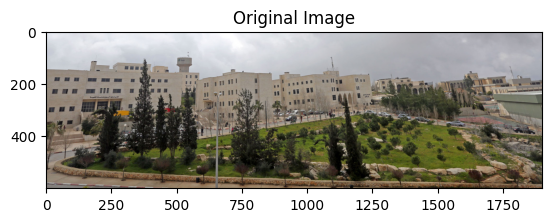

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
# Load an image
image = cv.imread('buildings.jpg')
# Display the image
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

#### Task 1:  
What is the shape of the loaded image?  What does each dimension represent?

In [4]:
image.shape

(600, 1900, 3)

(Height , Width , Channels)

- **Height**: The number of rows in the image.
- **Width**: The number of columns in the image.
- **Channels**: The number of color channels in the image (e.g., 3 for RGB images, 1 for grayscale images).

#### Task 2:  
repeat  the  previous  code  but  now  pass  the  image  directly  to  plt.imshow().I.e., without using cv.cvtColor().  Do you notice any difference?  Why?

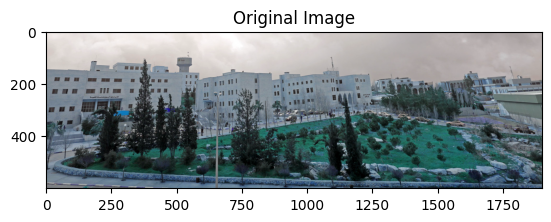

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
# Load an image
image = cv.imread('buildings.jpg')
# Display the image
plt.imshow(image)
plt.title('Original Image')
plt.show()

there is some difference in the colors the imshow wants BGR

### Grayscale conversion

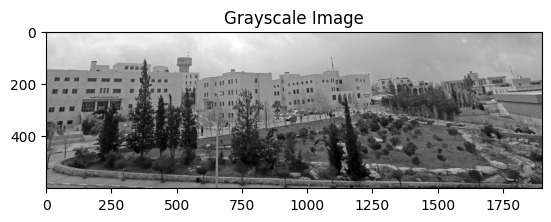

In [6]:
# Convert the image to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

#### Task 3:  
What is the shape of the grayimage?  What does each dimension represent?

In [7]:
gray_image.shape

(600, 1900)

it gives only height and width without channel so channel is 1 (grayscale)

### Image transformation

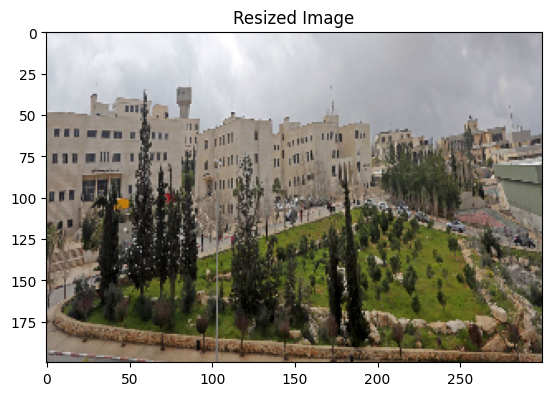

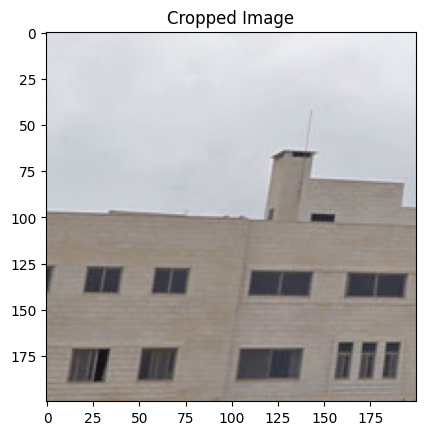

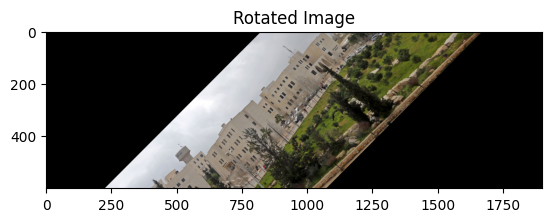

In [8]:
image = cv.imread('buildings.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Resize and crop the image
resized_image = cv.resize(image, (300, 200))
cropped_image = image[50:250, 50:250]

# Rotate the image
rows, cols = image.shape[:2]
M = cv.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)
rotated_image = cv.warpAffine(image, M, (cols, rows))

# Display the transformed images
plt.imshow(resized_image)
plt.title('Resized Image')
plt.show()

plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.show()

plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()

#### Task 4:  
Rotate the original image by 10 degrees counter-clockwise around the upper-left corner of the image.

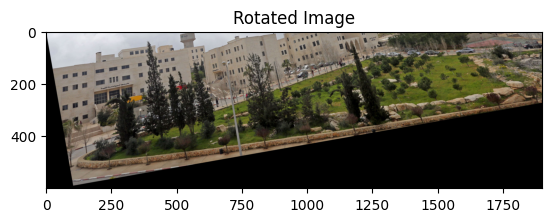

In [9]:
image = cv.imread('buildings.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Rotate the image
rows, cols = image.shape[:2]
M = cv.getRotationMatrix2D((0, 0), 10, 1)
rotated_image = cv.warpAffine(image, M, (cols, rows))

plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()

### Gaussian blurring

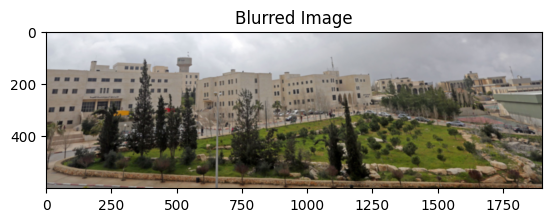

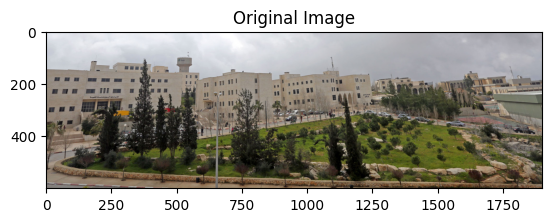

In [10]:
# Apply Gaussian blur
blurred_image = cv.GaussianBlur(image, (7, 7), 0)

# Display the result
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.show()

plt.imshow(image)
plt.title('Original Image')
plt.show()

#### Task 5:  
What does (7, 7) in the previous code represent?  try to increase this value,what do you notice?

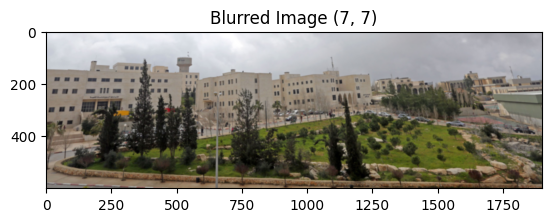

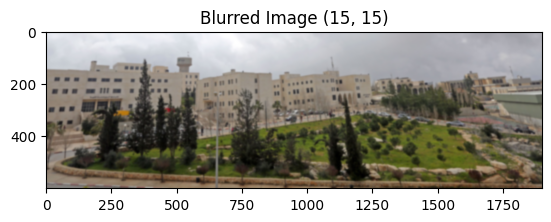

In [11]:
# Apply Gaussian blur
blurred_image_77 = cv.GaussianBlur(image, (7, 7), 0)
blurred_image_1515 = cv.GaussianBlur(image, (15, 15), 0)

# Display the result
plt.imshow(blurred_image_77)
plt.title('Blurred Image (7, 7)')
plt.show()

plt.imshow(blurred_image_1515)
plt.title('Blurred Image (15, 15)')
plt.show()

15, 15 more blur

kernel size 

### Edge detection

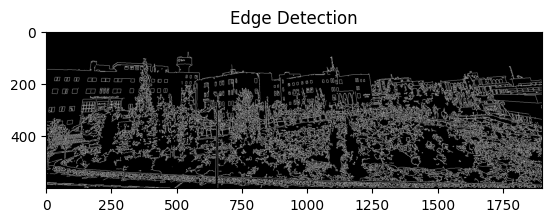

In [12]:
# Perform edge detection using Canny
edges = cv.Canny(gray_image, 50, 150)

# Display the result
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

#### Task 6:  
Explain the parameters of cv.Canny().  How do they affect the results?


- **threshold1**: The lower threshold value for the hysteresis procedure. Any edge intensity below this value is considered not an edge.

- **threshold2**: The upper threshold value for the hysteresis procedure. Any edge intensity above this value is considered an edge. 

Intensities between threshold1 and threshold2 are considered edges only if they are connected to strong edges (those above threshold2).

## 1.2    Image Classification / Object Recognition

### 1.2.1    Image classification with MLP

#### Loading images

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(
         (0.5, 0.5, 0.5), 
         (0.5, 0.5, 0.5))
         ]
     )

batch_size = 4
trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True,
    transform=transform
    )


trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2
    )

testset = torchvision.datasets.CIFAR10(
    root='./data',
      train=False,
      download=True, 
      transform=transform
      )

testloader = torch.utils.data.DataLoader(
    testset, 
    batch_size=batch_size,
    shuffle=False, 
    num_workers=2
    )

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


#### Displaying some training images

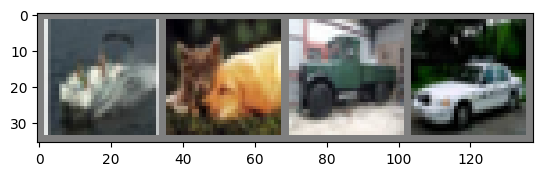

ship 			dog  			truck			car  	


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5   # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('\t\t'.join(f'{classes[labels[j]]:5s}\t'for j in range(batch_size)))

In [15]:
images.shape

# [batch_size, channels, height, width]

torch.Size([4, 3, 32, 32])

##### Task 7:  
Explain  the  effect  of  the  following  transforms  transforms.ToTensor(),  andtransforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)).

- `transforms.ToTensor()` converts an image to a PyTorch tensor and scales pixel values from [0, 255] to [0, 1].
- `transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))` normalizes the tensor by adjusting the mean to 0 and scaling the values to [-1, 1].

##### Task 8: 
 What is the purpose of the following line:  np.transpose(npimg, (1, 2, 0))?

np.transpose(npimg, (1, 2, 0)) rearranges the dimensions of the image array from (C, H, W) to (H, W, C) to make it displayable. This converts the image from PyTorch's format to the standard image format.

#### Defining the network

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3072, 64) # 32*32*3
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10) # number of classes 10
        
    def forward(self, x):
        # apply the first layer with relu activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
device = torch.device('cuda:0'if torch.cuda.is_available() else'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

net.to(device)

torch.cuda.get_device_name(0)

cuda:0


'NVIDIA GeForce GTX 1050'

#### Define a Loss function and optimizer

In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### Train the network

In [18]:
net.train()
for epoch in range(2): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(torch.flatten(inputs,1))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:
          # print every 2000 mini-batches
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
          running_loss = 0.0
        
print('Finished Training')

[1,  2000] loss: 1.945
[1,  4000] loss: 1.728
[1,  6000] loss: 1.679
[1,  8000] loss: 1.642
[1, 10000] loss: 1.600
[1, 12000] loss: 1.597
[2,  2000] loss: 1.503
[2,  4000] loss: 1.506
[2,  6000] loss: 1.505
[2,  8000] loss: 1.508
[2, 10000] loss: 1.465
[2, 12000] loss: 1.497
Finished Training


#### Test the network on the test data

In [19]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients forour outputs
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(torch.flatten(images,1))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 47 %


##### Task 9:  
For the first layer in the MLP (self.fc1 = nn.Linear(3072, 64) ), what doesthe number 3072 represent?

channels * height * width

### 1.2.2    Image classification with CNNs

In [20]:
import torch.nn as nn
import torch.nn.functional as F

class NetCNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = NetCNN()
net = net.to(device)


1. **`self.conv1 = nn.Conv2d(3, 6, 5)`**:
   - **Purpose**: Defines the first convolutional layer.
   - **Details**: This layer takes an input with 3 channels (e.g., an RGB image) and applies 6 convolutional filters, each of size `5x5`. The output will have 6 channels.

2. **`self.pool = nn.MaxPool2d(2, 2)`**:
   - **Purpose**: Defines a max-pooling layer.
   - **Details**: This layer reduces the spatial dimensions (height and width) of the input by a factor of 2, using a `2x2` window, by taking the maximum value in each `2x2` region.

3. **`self.conv2 = nn.Conv2d(6, 16, 5)`**:
   - **Purpose**: Defines the second convolutional layer.
   - **Details**: This layer takes the 6-channel output from the first layer and applies 16 convolutional filters, each of size `5x5`. The output will have 16 channels.

#### Task 10:  
Study the CNN code and answer the following questions:
- How many layers does the network have?
- What does the parameters of nn.Conv2d represent?

- What does the parameters of nn.MaxPool2d represent?

- In the first linear layer, what does the number 16 * 5 * 5 represent?  How to obtainthis number?

### 1. 
- The network has 7 layers in total:
  - 2 Convolutional layers (`conv1`, `conv2`)
  - 2 Max Pooling layers (`pool`)
  - 3 Fully Connected (Linear) layers (`fc1`, `fc2`, `fc3`)

### 2.
- `nn.Conv2d(3, 6, 5)` parameters:
  - `3`: Number of input channels (e.g., 3 for RGB images).
  - `6`: Number of output channels (number of filters).
  - `5`: Size of each convolutional filter (5x5).

### 3.
- `nn.MaxPool2d(2, 2)` parameters:
  - `2`: The size of the pooling window (2x2).
  - `2`: The stride, which determines the step size for the window (also 2, meaning no overlap).

### 4.
- `16 * 5 * 5` is the number of features (nodes) from the output of the second convolutional layer that are flattened to connect to the first fully connected layer.
- **How to obtain this number**:
  - `16` is the number of output channels from `conv2`.
  - `5 * 5` represents the spatial dimensions (height and width) of the feature maps after the second convolution and pooling operations. This is calculated from the input image size and the effects of the convolutional and pooling layers on the spatial dimensions. 

    For a 32x32 input image:
    - After `conv1` (5x5 filter) and `pool`: 32 → 28 (conv) → 14 (pool).
    - After `conv2` (5x5 filter) and `pool`: 14 → 10 (conv) → 5 (pool).
    - The resulting feature map size is 16 channels of 5x5 spatial dimensions.

In [21]:
net.train()
for epoch in range(3): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:
          # print every 2000 mini-batches
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
          running_loss = 0.0
        
print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.305
[1,  6000] loss: 2.305
[1,  8000] loss: 2.305
[1, 10000] loss: 2.304
[1, 12000] loss: 2.305
[2,  2000] loss: 2.305
[2,  4000] loss: 2.306
[2,  6000] loss: 2.305
[2,  8000] loss: 2.303
[2, 10000] loss: 2.306
[2, 12000] loss: 2.305
[3,  2000] loss: 2.305
[3,  4000] loss: 2.304
[3,  6000] loss: 2.305
[3,  8000] loss: 2.304
[3, 10000] loss: 2.307
[3, 12000] loss: 2.305
Finished Training


In [22]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients forour outputs
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 10 %


### 1.2.3    Transfer Learning

#### Finetuning the ConvNet

In [23]:
transform = transforms.Compose(
    [transforms.Resize(256),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406],
                           [0.229, 0.224, 0.225])
                           ]
                           )

In [24]:
import torch
import torchvision
import torchvision.transforms as transforms


batch_size = 4
trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True,
    transform=transform
    )


trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2
    )

testset = torchvision.datasets.CIFAR10(
    root='./data',
      train=False,
      download=True, 
      transform=transform
      )

testloader = torch.utils.data.DataLoader(
    testset, 
    batch_size=batch_size,
    shuffle=False, 
    num_workers=2
    )

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


In [25]:
from torchvision import datasets, models

net = models.alexnet(weights='IMAGENET1K_V1')
net.classifier[6] = nn.Linear(4096, 10)
net = net.to(device)

#### Finetuning vs Learning from scratch

In [26]:
from torchvision import datasets, models

net = models.alexnet()
net.classifier[6] = nn.Linear(4096, 10)
net = net.to(device)

In [27]:
net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [28]:
net.train()
for epoch in range(2): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:
          # print every 2000 mini-batches
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss /2000:.3f}')
          running_loss = 0.0
        
print('Finished Training')

[1,  2000] loss: 2.303
[1,  4000] loss: 2.303
[1,  6000] loss: 2.303
[1,  8000] loss: 2.302
[1, 10000] loss: 2.302
[1, 12000] loss: 2.303
[2,  2000] loss: 2.303
[2,  4000] loss: 2.303
[2,  6000] loss: 2.303
[2,  8000] loss: 2.302
[2, 10000] loss: 2.302
[2, 12000] loss: 2.303
Finished Training


In [29]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients forour outputs
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f'Accuracy of the network on the 10000 test images: {100 * correct// total} %')

Accuracy of the network on the 10000 test images: 11 %
